
# **UVOD**

Klasifikacija je ključni algoritam u oblasti mašinskog učenja koji se koristi za grupisanje podataka u određene kategorije na osnovu zadatih ulaznih informacija. Ovaj algoritam nalazi široku primenu u raznim domenima, od medicinske dijagnostike i analize sentimenta, do prepoznavanja objekata u slikama i filtriranja spam e-pošte. Glavni cilj klasifikacije je naučiti model kako da prepozna obrasce i veze između ulaznih podataka i pripadajućih klasa, kako bi mogao klasifikovati nove, do sada neviđene podatke. Ovaj proces se obično sastoji od nekoliko faza.

Prva faza je priprema podataka, gde se ulazni skup podataka deli na dve glavne grupe: trening podaci i test podaci. Trening podaci se koriste za obuku modela, dok se test podaci koriste za evaluaciju performansi modela nakon obuke. Važno je obezbediti da oba skupa podataka budu reprezentativna i adekvatna za problem koji se rešava.

Nakon pripreme podataka, sledeća faza je izbor odgovarajućeg algoritma za klasifikaciju. Postoji veliki broj algoritama za klasifikaciju, kao što su Naive Bayes, K-najbližih suseda, Logistička regresija, Stablo odlučivanja, Random Forests, Support Vector Machines (SVM) i neuronske mreže. Izbor algoritma zavisi od prirode problema, veličine i karakteristika podataka, kao i performansi koje se očekuju. Izborom algoritma, počinje sledeća faza koja podrazumeva trening modela. U ovoj fazi, algoritam koristi trening podatke kako bi naučio veze između ulaznih podataka i pripadajućih klasa. To se postiže prilagođavanjem parametara modela kako bi minimizirao grešku u predviđanju klasa na trening podacima. Veličina trening skupa i broj iteracija treninga mogu uticati na kvalitet naučenog modela.

Nakon završetka treninga, model se testira u fazi evaluacije. Test podaci se koriste kako bi se procenila tačnost, preciznost, odziv i ostale metrike performansi modela. Ove metrike pružaju informacije o tome koliko dobro model generalizuje naučeno znanje na nove podatke.

Klasifikacija ima mnoge benefite i primene. Na primer, u medicinskoj dijagnostici, klasifikacija se koristi za identifikaciju bolesti na osnovu simptoma i medicinskih nalaza. Takođe se koristi za prepoznavanje prevare u finansijskim transakcijama, za personalizaciju preporuka proizvoda na e-trgovinskim platformama, za prepoznavanje emocija u tekstu ili govoru, kao i za automatsko filtriranje neželjene pošte.




# **SET PODATAKA**

Glavni cilj ovog zadatka je precizno identifikovati 99 vrsta biljaka koristeći binarne slike listova i njihove karakteristike, kao što su oblik, margine i tekstura.

# **IMPLEMENTACIJA REŠENJA**

Na početku projekta, importovali smo biblioteke NumPy i Pandas kako bismo koristili njihove funkcionalnosti u našem  kodu.

**Biblioteka NumPy** je korisna za rad sa numeričkim podacima, posebno za efikasno rukovanje višedimenzionalnim nizovima i matricama. Ona nam pruža brojne funkcije za izvođenje matematičkih operacija, kao što su dodavanje, oduzimanje, množenje i deljenje, kao i funkcije za linearnu algebru, statistiku i generisanje slučajnih brojeva. NumPy omogućava brzu i efikasnu obradu podataka, što je ključno u oblastima kao što su naučno računanje, analiza podataka i mašinsko učenje.

**Pandas** biblioteka je namenjena manipulaciji podacima u tabelarnom formatu. Ona pruža moćne strukture podataka, poput DataFrame-a, koji nam omogućavaju organizaciju, filtriranje, sortiranje i transformaciju podataka. Pandas takođe nudi alate za čitanje podataka iz različitih izvora, kao što su CSV ili Excel fajlovi, kao i mogućnost pisanja podataka u željenom formatu. Ova biblioteka je veoma korisna u analizi podataka, istraživanju, finansijama i mašinskom učenju, jer olakšava manipulaciju i obradu velikih skupova podataka.



In [1]:
import numpy as np
import pandas as pd


U daljem radu, vršimo importovanje neophodnih biblioteka koje će nam biti od koristi za vizualizaciju podataka, kao i za samu implementaciju algoritama mašinskog učenja.

**Seaborn**: Biblioteka za vizualizaciju podataka. Pruža funkcionalnosti za izradu atraktivnih i informativnih grafika.

**Matplotlib**: Biblioteka za crtanje grafika. Omogućava izradu različitih vrsta grafika za prikazivanje podataka.

**Scikit-learn** (*sklearn*): Biblioteka za mašinsko učenje. Pruža algoritme za preprocesiranje podataka, različite modele mašinskog učenja, metode evaluacije modela i alate za podelu podataka na trening i test skupove.

**LabelEncoder** je klasa koja se koristi za enkodiranje kategoričkih podataka u numerički oblik. U kontekstu mašinskog učenja, mnogi algoritmi zahtevaju numeričke vrednosti za ulazne podatke, pa je potrebno pretvoriti kategoričke varijable u odgovarajuće brojčane vrednosti. LabelEncoder mapira svaku jedinstvenu vrednost u kategoričkoj varijabli u jedinstvenu celobrojnu vrednost.

**StandardScaler** je klasa koja se koristi za standardizaciju numeričkih podataka. Standardizacija podrazumeva skaliranje podataka tako da imaju srednju vrednost 0 i standardnu devijaciju 1. Ovo je korisno kada algoritmi zahtevaju da su podaci na istoj skali ili kada želimo da smanjimo uticaj veličina različitih varijabli na rezultate modela. StandardScaler obrađuje svaku varijablu tako da je njen raspored podataka ima srednju vrednost blizu 0 i standardnu devijaciju blizu 1.

In [2]:
# Importovanje paketa
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import cv2

%matplotlib inline

U ovom delu koda koristili smo google.colab biblioteku koja pruža funkcionalnosti za interakciju sa Google Colab okruženjem.

Prvo smo importovali modul files iz google.colab biblioteke. Ovaj modul omogućava rad sa datotekama u Google Colab okruženju, uključujući njihovo uplodovanje i preuzimanje.

Zatim smo izvršili funkciju files.upload(), koja prikazuje korisniku interaktivno dugme "Choose Files". Kada korisnik klikne na to dugme, otvara se dijalog za odabir datoteka sa lokalnog računara. Korisnik može izabrati jednu ili više datoteka za upload. Nakon što korisnik izabere datoteke i klikne na "Upload", datoteke se prenose u Google Colab sesiju i smeštaju u promenljivu uploaded.

Ova funkcionalnost je korisna kada radimo sa lokalnim podacima ili datotekama i želimo da ih prenesemo u Google Colab okruženje radi dalje obrade, analize ili mašinskog učenja. Time nam se omogućava da radimo sa različitim skupovima podataka i prilagođavamo analize i modele našim potrebama.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


U narednom delu koda, uvezli smo biblioteku pandas pod imenom pd, koja nam omogućava rad sa tabularnim podacima.

Nakon toga smo definisali putanje do datoteka train.csv i test.csv, koje smo prethodno učitali u Google Colab okruženje pomoću funkcionalnosti za upload datoteka.

Zatim smo koristili funkciju pd.read_csv() iz pandas biblioteke da učitamo sadržaj CSV datoteka i pretvorimo ih u DataFrame objekte. Učitane podatke smo smestili u promenljive train_raw i test_raw.

Ovo nam omogućava da dalje radimo sa podacima iz train.csv i test.csv datoteka koristeći DataFrame strukturu, koja pruža mnoge funkcionalnosti za manipulaciju, analizu i obradu tabularnih podataka.

In [5]:
import pandas as pd

# Kreiranje putanje za upload-ovane fajlove
train_file_path = 'train.csv'

test_file_path = 'test.csv'

# Ucitavanje csv fajla
#df = pd.read_csv(file_path)

# Kreiranje pandas dataframe-a
train_raw = pd.read_csv(train_file_path)
test_raw = pd.read_csv(test_file_path)

#print type(train_raw), type(test_raw)
print ('Imamo {}'.format(train_raw.shape[0]), \
       'uzoraka za kreiranje modela mašinskog učenja i {}'.format(test_raw.shape[0]), \
       'uzoraka za evaluaciju učinka.')

Imamo 990 uzoraka za kreiranje modela mašinskog učenja i 594 uzoraka za evaluaciju učinka.


In [6]:
# Uz pomoc head funkcije, vidimo prvih 5 torki iz našeg dataset-a
train_raw.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


U ovom delu koda, prvo smo importovali modul random, koji nam pruža funkcionalnosti za generisanje slučajnih brojeva i odabir nasumičnih elemenata iz liste.

Zatim smo koristili train_raw['species'].unique().tolist() da bismo dobili listu jedinstvenih vrsta biljaka koje se nalaze u koloni 'species' u train_raw DataFrame-u. To smo postigli kombinacijom unique() funkcije, koja vraća jedinstvene vrednosti iz kolone, i tolist() funkcije, koja konvertuje rezultat u listu.

Nakon toga, koristili smo random.sample(unique_species, 20) da bismo izabrali nasumično 20 vrsta biljaka iz liste jedinstvenih vrsta. Ova funkcija nam omogućava da izaberemo nasumične elemente iz liste bez ponavljanja.

Dalje smo filtrirali train_raw DataFrame tako da uključuje samo vrste biljaka koje su nasumično odabrane. To smo postigli korišćenjem train_raw['species'].isin(random_species) uslovnog filtera, koji proverava da li vrednost u koloni 'species' pripada listi nasumično odabranih vrsta.

Nakon filtriranja podataka, koristili smo sns.set(style="whitegrid") da bismo postavili stil grafa na "whitegrid", što daje belu mrežu u pozadini.

Zatim smo kreirali grafikon broja uzoraka za odabrane nasumične vrste biljaka koristeći sns.countplot() funkciju. Prosledili smo filtered_df DataFrame kao podatke za grafikon, x='species' da bismo prikazali broj uzoraka po vrstama biljaka, i palette='Set3' da bismo postavili boje za različite vrste.

Dodali smo naslov grafikona, oznake osa i prilagodili veličinu i stil fonta na odgovarajući način. Takođe smo rotirali oznake na x-osi radi bolje čitljivosti ako je potrebno.

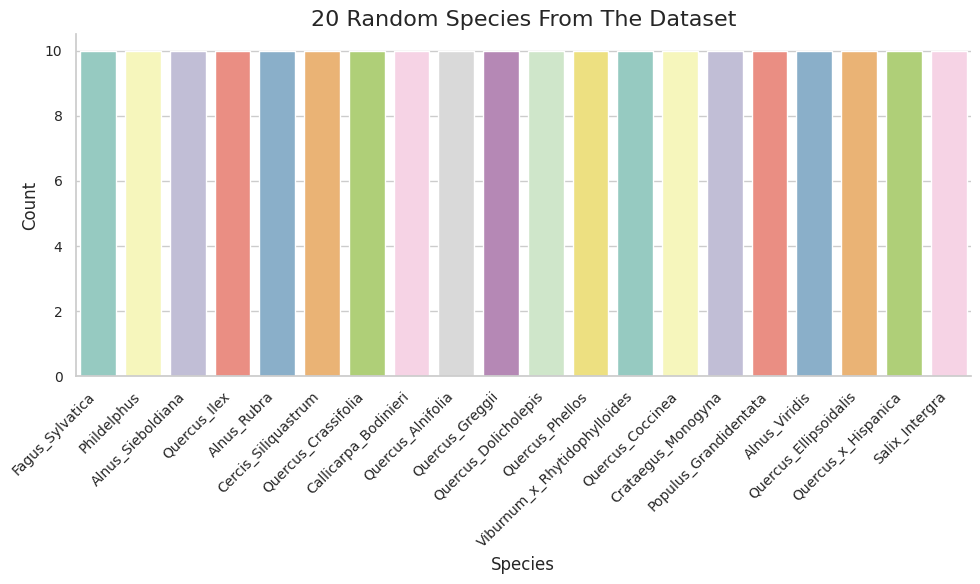

In [7]:
import random

unique_species = train_raw['species'].unique().tolist()

# Selektujemo 20 random vrsta
random_species = random.sample(unique_species, 20)

# Filtriramo df da sadrži samo izabrane vrste
filtered_df = train_raw[train_raw['species'].isin(random_species)]

# Postavljamo stil uz pomoć ugrađene set funkcije u okviru seaborn-a
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))  #
sns.countplot(data=filtered_df, x='species', palette='Set3')


plt.title('20 Random Species From The Dataset', fontsize=16)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotiramo za 45 stepeni zbog bolje čitkosti
plt.xticks(rotation=45, ha='right', fontsize=10)

# Povećavamo font size
plt.yticks(fontsize=10)


sns.despine()

# Plotujemo
plt.tight_layout()
plt.show()

train_raw.isnull().sum() funkcija se koristi za pronalaženje sume null (nepostojećih) vrednosti u svakoj koloni DataFrame-a train_raw.

Kada pozovemo train_raw.isnull(), dobijamo DataFrame iste dimenzije kao train_raw, gde su vrednosti True za sve ćelije koje su null, odnosno False za sve ostale ćelije.

Nakon toga, pozivanjem .sum() nad ovim DataFrame-om, dobijamo sumu po kolonama, jer je podrazumevana osa sumiranja 0 (kolone) za DataFrame.

Ova funkcija omogućava nam da brzo identifikujemo koliko null vrednosti ima u svakoj koloni DataFrame-a.

In [8]:
train_raw.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

U ovom delu koda vršimo pripremu podataka kako bismo ih prilagodili za klasifikator.

LabelEncoder je klasa iz biblioteke sklearn.preprocessing koja se koristi za enkodiranje kategoričkih etiketa (u ovom slučaju vrsta biljaka) u numeričke vrednosti. Prvo instanciramo objekat LabelEncoder i zatim ga "fitujemo" na kolonu species u train_raw DataFrame-u. Ovaj korak je neophodan kako bismo naučili enkoder da mapira svaku jedinstvenu vrstu listova na odgovarajuću numeričku vrednost.

Nakon toga, koristimo naučeni LabelEncoder objekat da enkodiramo vrste biljaka u numeričke labele. To znači da svaka vrsta dobija dobija numeričku vrednost umesto originalnog naziva vrste.

Koristimo metodu drop kako bismo izbacili kolone "id" i "species".
id kolona se uklanja jer ne sadrži relevantne informacije za treniranje modela. Ona jednostavno označava identifikacioni broj svake slike lista.

Sa druge strane, species kolona se uklanja jer je to ciljna promenljiva koju želimo da predvidimo, a nećemo je koristiti kao ulaznu karakteristiku.


Ovim uklanjanjem nepotrebnih kolona iz podataka dobijamo DataFrame train koji sadrži samo numeričke karakteristike listova koje će se koristiti za treniranje klasifikatora.

In [9]:
# Pretprocesiranje
le = LabelEncoder().fit(train_raw.species) # Instanciranje LabelEncoder-a
labels = le.transform(train_raw.species)
classes = list(le.classes_)
test_ids = test_raw.id

train = train_raw.drop(['id', 'species'], axis=1)
test = test_raw.drop(['id'], axis=1)

In [10]:
# Provera podataka
print ("Dimenzije train i labels su: ", train.shape, labels.shape)
print ("Ukupno ima {} vrsta.".format(len(classes)))
print ("Dimenzije test i test_ids su : ", test.shape, test_ids.shape)

Dimenzije train i labels su:  (990, 192) (990,)
Ukupno ima 99 vrsta.
Dimenzije test i test_ids su :  (594, 192) (594,)


StratifiedShuffleSplit je metoda za uzorkovanje koja se koristi za podelu podataka na trening i test skupove. Glavni cilj ove metode je održavanje ravnoteže između klasa u obe podele. To znači da će raspodela klasa u trening i test skupovima biti slična.

n_splits=10: Ovde postavljamo broj ponavljanja (splitova) podela podataka. U ovom slučaju, podaci će biti podeljeni u 10 različitih trening-test skupova.

test_size=0.2: Ovde postavljamo veličinu test skupa kao udeo ukupnog skupa podataka. U ovom slučaju, test skup će činiti 20% podataka.

random_state=0: Ovde postavljamo seme slučajnog generatora. To osigurava da se podela podataka može reprodukovati, tj. da će se ista podela dobiti svaki put kada se kod izvrši.

ss_split.get_n_splits(train, labels): Ovom metodom dobijamo ukupan broj splitova koji će se napraviti.

Kao što se može videti u ćeliji ispod, korišćenjem for petlje prolazimo kroz svaki split i dobijamo indekse trening i test skupova.

X_train, X_test = train.values[train_index], train.values[test_index] i y_train, y_test = labels[train_index], labels[test_index]: Ovde se vrši samostalno deljenje podataka na trening i test skupove. Varijable X_train i X_test sadrže karakteristike listova za trening i testiranje, dok y_train i y_test sadrže odgovarajuće enkodirane oznake vrsta biljaka.

Ova podela podataka je važna kako bismo imali nezavisni skup podataka za evaluaciju performansi modela mašinskog učenja. Stratifikacija omogućava da se održi ravnoteža između klasa u obe podele, što je posebno korisno ako imamo nejednake raspodele klasa. Ovo osigurava pouzdanu procenu performansi modela na različitim klasama.

In [11]:
# konstrukcija iteratora
ss_split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
ss_split.get_n_splits(train, labels)

for train_index, test_index in ss_split.split(train, labels):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [12]:
print (y_train.shape, y_test.shape)

(792,) (198,)


Algoritam Naive Bayes potiče iz Bayesove teorije, koju je formulisao engleski matematičar Thomas Bayes u 18. veku. Bayesov teorem omogućava izračunavanje verovatnoća događaja na osnovu dostupnih dokaza. Algoritam Naive Bayes koristi Bayesov teorem za predviđanje pripadnosti klasi na osnovu karakteristika podataka.

Naive Bayes pretpostavlja nezavisnost između karakteristika podataka, što znači da se pretpostavlja da je pojavljivanje jedne karakteristike nezavisno od pojavljivanja drugih karakteristika. Ova pretpostavka čini algoritam jednostavnim i brzim za izračunavanje.

Naive Bayes koristi statističke verovatnoće kako bi odredio koja klasa najverovatnije odgovara određenim ulaznim karakteristikama. Osnovna formula za primenu Bayesovog teorema u Naive Bayes algoritmu izgleda ovako:

P(c|x) = (P(x|c) * P(c)) / P(x)

Gde:

P(c|x) je verovatnoća da je klasa c tačna s obzirom na ulazne karakteristike x.

P(x|c) je verovatnoća ulaznih karakteristika x ako je klasa c tačna.

P(c) je verovatnoća klase c (prevalencija klase u podacima).

P(x) je verovatnoća ulaznih karakteristika x.

Pored toga, Naive Bayes koristi tzv. "nultu uslovnu nezavisnost" koja podrazumeva da svi atributi imaju jednak uticaj na klasifikaciju, nezavisno od postojanja drugih atributa. Ova pretpostavka, iako često nerealna, čini algoritam jednostavnim za implementaciju.

Prvo smo instancirali Naive Bayes klasifikator koristeći GaussianNB(). Zatim smo koristili fit() metodu da bismo obučili klasifikator na trening podacima (X_train - ulazne karakteristike, y_train - odgovarajuće oznake klasa).

Koristili smo unakrsnu validaciju (cross_val_score()) kako bismo procenili performanse klasifikatora na različitim delovima trening podataka. Vrednosti tačnosti su izračunate za svaki presek (fold) unakrsne validacije i sačuvane su u scores.

Unakrsna validacija je tehnika koja se koristi za procenu performansi modela tako što se skup podataka deli na nekoliko manjih delova ili "preseka" (folds), a zatim se model trenira i testira na različitim kombinacijama ovih preseka.

Konkretno, cross_val_score omogućava automatsku primenu unakrsne validacije na modelu kako bi se izračunala tačnost modela na različitim delovima skupa podataka. Ova funkcija uzima model, ulazne karakteristike, oznake klasa i broj preseka kao ulazne argumente, a zatim izračunava tačnost modela za svaki presek.

Unakrsna validacija je korisna jer omogućava objektivniju procenu performansi modela, posebno kada imamo ograničen skup podataka. Kroz unakrsnu validaciju model se trenira i testira na različitim podskupovima, što pomaže u otkrivanju varijabilnosti performansi modela i identifikaciji problema kao što su preterano prilagođavanje (overfitting) ili neodgovarajuće generalizovanje.

Nakon toga, uz pomoć funkcije np.mean(scores) izračunali smo prosečnu tačnost na osnovu rezultata unakrsne validacije.

train_predictions = clf.predict(X_test): Koristili smo obučeni klasifikator da bismo napravili predviđanja na test podacima (X_test - ulazne karakteristike). Ove predikcije su sačuvane u train_predictions.

I na samom kraju, računamo accuracy i log_loss.

Accuracy nam daje informaciju o udelu tačno klasifikovanih instanci u odnosu na ukupan broj instanci. Veća tačnost ukazuje na bolje performanse modela.

Gubitak logaritamske vrednosti (Log Loss) meri kvalitet verovatnoća predviđenih od strane modela. Niža vrednost gubitka ukazuje na bolje kalibrirane verovatnoće.

In [13]:
#Naive Bayes

clf = GaussianNB().fit(X_train, y_train) # Kreiranje instance klasifikatora
print ('ML Model: ', clf.__class__.__name__)

# Cross validacija
scores = cross_val_score(GaussianNB(), train.values, labels, cv=ss_split)
print ('Mean Cross-validation scores: {}'.format(np.mean(scores)))

train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print ('Accuracy: {:.4%}'.format(acc))

train_predictions = clf.predict_proba(X_test)
ll = log_loss(y_test, train_predictions)
print ('Log Loss: {:.6}'.format(ll))

ML Model:  GaussianNB
Mean Cross-validation scores: 0.5489898989898989
Accuracy: 55.0505%
Log Loss: 16.1755


ML Model: GaussianNB
Mean Cross-validation skor: 0.5490
Accuracy: 55.0505%


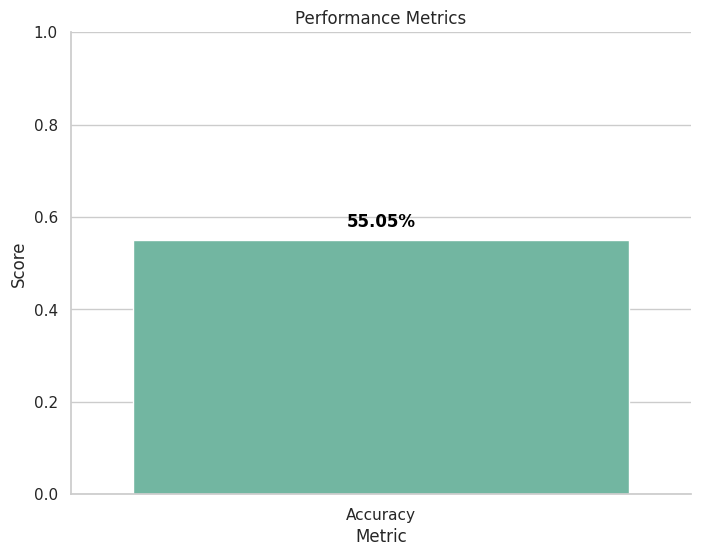

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Instanciranje  Gaussian Naive Bayes klasifikatora
clf = GaussianNB()

# Fitujemo klasifikator na trening podatke
clf.fit(X_train, y_train)


print('ML Model:', clf.__class__.__name__)

# Cross-validacija
scores = cross_val_score(GaussianNB(), train.values, labels, cv=ss_split)
mean_scores = np.mean(scores)
print('Mean Cross-validation skor: {:.4f}'.format(mean_scores))

# Kreiranje predikcija na test setu
test_predictions = clf.predict(X_test)

# Računanje accuracy
accuracy = accuracy_score(y_test, test_predictions)
print('Accuracy: {:.4%}'.format(accuracy))


sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))

# Setujemo paletu boja
colors = sns.color_palette("Set2")

# Plotujemo
sns.barplot(x=["Accuracy"], y=[accuracy], palette=colors, label='Accuracy')

# Dodavanje anotacija
for i, v in enumerate([accuracy]):
    plt.text(i, v + 0.02, '{:.2%}'.format(v), ha='center', va='bottom', fontweight='bold', color='black')


plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')

# Setujemo limit y ose
plt.ylim([0, 1])


sns.despine()


plt.show()



Logistička regresija je statistička metoda koja se koristi za predviđanje kategoričke zavisne promenljive na osnovu jedne ili više nezavisnih promenljivih. Na primer, može se koristiti za predviđanje da li je određeni e-mail spam ili ne-spam na osnovu različitih karakteristika e-maila.

Princip rada ove metode je sledeći:

 Imamo skup podataka koji se sastoji od nizova uzoraka, gde svaki uzorak ima određene karakteristike (nezavisne promenljive) i pripadajuću kategoriju ili oznaku (zavisna promenljiva).  Logistička regresija prvo izračunava linearnu kombinaciju karakteristika svakog uzorka, gde se svaka karakteristika množi sa svojim odgovarajućim koeficijentom. Ova linearna kombinacija se može zapisati kao: z = b0 + b1x1 + b2x2 + ... + bn*xn, gde su b0, b1, b2, ..., bn koeficijenti regresije, a x1, x2, ..., xn karakteristike uzorka.

 Linearna kombinacija se zatim prosleđuje kroz logističku funkciju koja transformiše vrednost u opseg između 0 i 1. Logistička funkcija (sigmoidna funkcija) se može zapisati kao: p = 1 / (1 + exp(-z)), gde je p verovatnoća da uzorak pripada određenoj klasi.

 Nakon što su izračunate verovatnoće, postavlja se prag (najčešće 0.5) kako bi se donela konačna klasifikacija. Ako je verovatnoća veća od praga, uzorak se klasifikuje u jednu klasu, a ako je manja ili jednaka pragu, klasifikuje se u drugu klasu.

 Da bi se pronašli optimalni koeficijenti regresije (b0, b1, b2, ..., bn), koristi se postupak koji se naziva "treniranje modela". Ovo uključuje minimizaciju određene funkcije gubitka (kao što je negativna log-izglednost) korišćenjem metoda optimizacije poput metode najveće verodostojnosti ili gradijentnog spusta.

 Nakon što je model treniran, evaluiramo njegovu performansu koristeći metrike kao što su tačnost, preciznost, odziv, F1 mera itd. Ove metrike nam daju informacije o tome koliko dobro model klasifikuje nove, neviđene podatke.

 **Newton-CG** je jedna od metoda za rešavanje optimizacionog problema koji se javlja pri treniranju logističke regresije. Ova metoda koristi kombinaciju Newtonove metode i konjugovanih gradijenata kako bi pronašla minimum funkcije gubitka. U ovom slučaju, koristimo Newton-CG kao rešavač (solver) za logističku regresiju.

 **GridSearchCV** je tehnika koja se koristi za pretragu hiperparametara kako bi se pronašli najbolji parametri za model. Hiperparametri su parametri koji se postavljaju pre treniranja modela i ne mogu se naučiti tokom samog treninga. GridSearchCV prolazi kroz sve kombinacije parametara definisane u parametarskoj mreži (param_grid) i evaluira model sa svakom kombinacijom. Na kraju se bira kombinacija koja daje najbolje rezultate na osnovu zadate metrike evaluacije.

 **param_grid:** param_grid je rečnik (dictionary) koji sadrži kombinacije vrednosti hiperparametara koje će se testirati tokom pretrage po mreži. U našem slučaju, za parametre C i tol definišemo vrednosti koje želimo da testiramo. Na primer, za C testiramo vrednosti 1000 i 10000, a za tol testiramo vrednosti 0.000001 i 0.00001. Pretraga po mreži će izvršiti sve kombinacije ovih vrednosti i odabrati kombinaciju koja daje najbolje rezultate.

In [15]:
# Standardizacija trening podataka
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

#param_grid = {'C':[1, 10],
#              'tol': [0.001, 0.0001]}
param_grid = {'C': [ 1000, 10000],
              'tol': [0.000001, 0.00001]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
grid_search = GridSearchCV(log_reg, param_grid, scoring='neg_log_loss', refit='True', n_jobs=1, cv=ss_split)
grid_search.fit(X_train_scaled, y_train)

print ('Najbolji parametar: {}'.format(grid_search.best_params_))
print ('\nNajbolji estimator:\n{}'.format(grid_search.best_estimator_))

Najbolji parametar: {'C': 1000, 'tol': 1e-06}

Najbolji estimator:
LogisticRegression(C=1000, multi_class='multinomial', solver='newton-cg',
                   tol=1e-06)


U ovom delu koda vršimo evaluaciju modela logističke regresije koji je optimizovan prethodno izvršenom GridSearchCV metodom.

Prvo se koristi StandardScaler objekat za standardizaciju testnog skupa podataka X_test. Ovde se koristi scaler koji je prethodno naučen na trening skupu kako bi se testni skup skalirao na isti način kao i trening skup. To je važno jer model očekuje da podaci budu skalirani na isti način.

 Skalirani testni skup X_test se dobija primenom transformacije skaliranja na originalne podatke.

 Nakon toga, vrši se predviđanje na skaliranim testnim podacima koristeći model koji je rezultat GridSearchCV optimizacije.

 Izračunava se tačnost (accuracy) modela upoređujući predviđene vrednosti (train_predictions) sa stvarnim vrednostima ciljne promenljive y_test. Tačnost predstavlja procenat tačno klasifikovanih uzoraka u odnosu na ukupan broj uzoraka.

In [16]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

print ('ML Model: Logistička regresija')
# Accuracy
train_predictions = grid_search.predict(X_test_scaled)
acc = accuracy_score(y_test, train_predictions)
print ('Accuracy: {:.4%}'.format(acc))
# Logloss
train_predictions_p = grid_search.predict_proba(X_test_scaled)
ll = log_loss(y_test, train_predictions_p)
print ('Log Loss: {:.6}'.format(ll))

ML Model: Logistička regresija
Accuracy: 98.9899%
Log Loss: 0.0253898


Na samom kraju našeg projekta, korišćenjem biblioteka za vizualizaciju seaborn i matplotlib vršimo prikaz performansi algoritma logističke regresije.

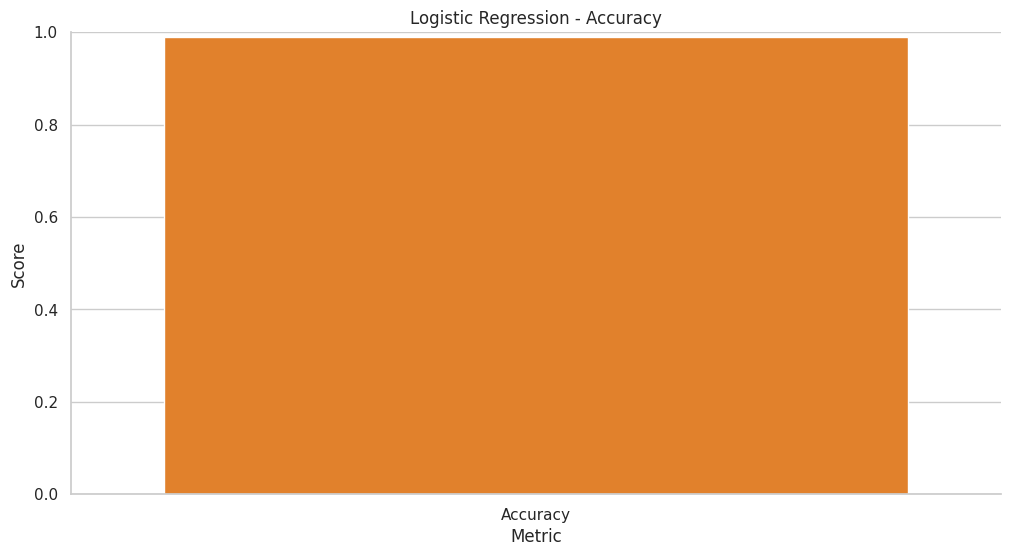

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Standardizacija testnih podataka
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

# Vršenje predikcije
train_predictions = grid_search.predict(X_test_scaled)

# Računanje accuracy-a
accuracy = accuracy_score(y_test, train_predictions)


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))


colors = ["#FF7F0E"]  # Color


sns.barplot(x=["Accuracy"], y=[accuracy], palette=colors, label='Accuracy')



plt.title('Logistic Regression - Accuracy')
plt.xlabel('Metric')
plt.ylabel('Score')


plt.ylim([0, 1])


sns.despine()


plt.show()


# **ZAKLJUČAK**



Na osnovu tačnosti od 55%, možemo izvući sledeće zaključke:

Algoritam tačno klasifikuje 55% instanci u testnom skupu.
Preostalih 45% instanci su netačno klasifikovane ili pogrešno klasifikovane od strane algoritma.
Tačnost od 55% ukazuje na to da je prediktivna sposobnost algoritma umerena, ali možda nije dovoljno precizna za određene primene.
Kako bismo dalje analizirali šta se može dešavati u  algoritmu, bitno je uzeti u obzir i druge faktore kao što su konkretan skup podataka, raspodela klasa, kvalitet karakteristika i potencijalni izvori grešaka ili netačne klasifikacije. Dodatna analiza i dijagnostika bi bili neophodni kako bi se dobile dublje uvide u ponašanje i performanse algoritma.

Možemo zaključiti da Gausov Naivni Bajes algoritam nije dobro obavio ovaj zadatak klasifikacije.

Logistička regresija je pokazala izuzetne performanse kada je reč o klasifikaciji. Činjenica da je accuracy 98.98% nam ukazuje na to da je model tačno klasifikovao 98.98% instanci u testnom skupu. Ovo je veoma visok procenat tačno klasifikovanih uzoraka i sugeriše da je model veoma dobro naučio da razlikuje između različitih klasa.

U ovom projektu smo primenili standardno skaliranje (StandardScaler) za obradu podataka, unakrsnu validaciju (cross-validation) za poboljšanje generalizacijskih performansi modela i grid pretragu (GridSearch) za pronalaženje optimalnih parametara. Kao rezultat, najbolju tačnost predikcije smo postigli sa modelom Logističke Regresije, koji je pokazao tačnost od oko 99%.


# **REFERENCE**

1. https://www.kaggle.com/

2. https://github.com/

3. https://scikit-learn.org/stable/modules/naive_bayes.html

4. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

5. https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

6. https://www.oreilly.com/library/view/python-data-science/9781491912126/

